# A Step by Step Comprehensive Guide to Advanced Exploratory Data Analysis (EDA) Using Python and Pandas
# Part 2 : Advanced Data Visualizations and Preprocessing/Analysis

###### install the neccessary packages

In [1]:
# !pip pandas
# !pip install skimpy

#### Import the neccessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
# pd.pandas.set_option("display.max_columns", None)
# display(HTML("<style>.container { width:90% !important; }</style>"))
# from skimpy import skim
# from skimpy import generate_test_data, skim
import matplotlib.pyplot as plt
# import missingno as msno
from wordcloud import WordCloud

#### Loading the data 

In [4]:
data = pd.read_csv("article_data/preprocessed_car_dateset.csv")
data.columns = data.columns.str.upper()  # convert the columns to uppercase

# slight preprocess : to change the PROD.YEAR TO PROD_YEAR
data.columns = data.columns.str.replace(".", "")
data.columns = data.columns.str.replace(" ", "_")
data
data

,PRICE,LEVY,MANUFACTURER,MODEL,PROD_YEAR,CATEGORY,LEATHER_INTERIOR,FUEL_TYPE,ENGINE_VOLUME,MILEAGE_KM,CYLINDERS,GEAR_BOX_TYPE,DRIVE_WHEELS,DOORS,WHEEL,COLOR,AIRBAGS
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15720,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,4-5,Left wheel,Silver,12
15721,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2-4,Left wheel,Silver,5
15722,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8
15723,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4-5,Left wheel,Grey,4


##### 21. Exploring Data Overviews Quickly with Skimpy

In [22]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15725  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name  ┃ NA    ┃ NA %   ┃ mean     ┃ sd       ┃ p0   ┃ p25   ┃ p50    ┃ p75    ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ PRICE        │     0 │      0 │    20000 │   210000 │    1 │  7500 │  14000 │  23000 │   26000000 │   ▇    │  │
│ │ LEVY         │  5684 │  36.15 │      880 │      460 │   87 │   640 │    780 │   1000 │      12000 │   ▇    │  │
│ │ PROD. YEAR   │     0 │      0 │     2000 │        6 │ 1900 │  2000 │   2000 │   2000 │       2000 │     ▂▇ │  │
│ │ MILEAGE_KM   │     0 │      0 │  1800000 │ 54000000 │    0 │ 67000 │ 120000 │ 180000 │ 2100000000 │   ▇    │  │
│ │ CYLINDERS    │     0 │      0 │      4.5 │      1.1 │    1 │     4 │      4 │      4 │         16 │   ▇▂   │  │
│ │ AIRBAGS      │     0 │      0 │      6.5 │      4.1 │    0 │     4 │      6 │     12 │         16 │ ▃▇▂▃▆  │  │
│ └──────────────┴───────┴────────┴──────────┴──────────┴──────┴───────┴────────┴────────┴────────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ MANUFACTURER                     │      0 │         0 │                          1 │                 15778 │  │
│ │ MODEL                            │      0 │         0 │                        1.3 │                 19946 │  │
│ │ CATEGORY                         │      0 │         0 │                          1 │                 15954 │  │
│ │ LEATHER INTERIOR                 │      0 │         0 │                          1 │                 15725 │  │
│ │ FUEL TYPE                        │      0 │         0 │                          1 │                 15810 │  │
│ │ ENGINE VOLUME                    │      0 │         0 │                        1.1 │                 17614 │  │
│ │ GEAR BOX TYPE                    │      0 │         0 │                          1 │                 15725 │  │
│ │ DRIVE WHEELS                     │      0 │         0 │                          1 │                 15725 │  │
│ │ DOORS                            │      0 │         0 │                          1 │                 15725 │  │
│ │ WHEEL                            │      0 │         0 │                          2 │                 31450 │  │
│ │ COLOR                            │      0 │         

In [24]:
data = generate_test_data()
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 1000   │ │ float64     │ 3     │ │ class                 │                                │
│ │ Number of columns │ 13     │ │ category    │ 2     │ │ location              │                                │
│ └───────────────────┴────────┘ │ datetime64  │ 2     │ └───────────────────────┘                                │
│                                │ object      │ 2     │                                                          │
│                                │ int64       │ 1     │                                                          │
│                                │ bool        │ 1     │                                                          │
│                                │ string      │ 1     │                                                          │
│                                │ timedelta64 │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA   ┃ NA %   ┃ mean    ┃ sd    ┃ p0        ┃ p25    ┃ p50       ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ length         │    0 │      0 │     0.5 │  0.36 │   1.6e-06 │   0.13 │       0.5 │  0.86 │     1 │ ▇▃▃▃▅▇ │  │
│ │ width          │    0 │      0 │       2 │   1.9 │    0.0021 │    0.6 │       1.5 │     3 │    14 │  ▇▃▁   │  │
│ │ depth          │    0 │      0 │      10 │   3.2 │         2 │      8 │        10 │    12 │    20 │ ▁▃▇▆▃▁ │  │
│ │ rnd            │  118 │   11.8 │   -0.02 │     1 │      -2.8 │  -0.74 │  -0.00077 │  0.66 │   3.7 │ ▁▅▇▅▁  │  │
│ └────────────────┴──────┴────────┴─────────┴───────┴───────────┴────────┴───────────┴───────┴───────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ class                            │         0 │              0 │ False                 │                  2 │  │
│ │ location                         │         1 │            0.1 │ False                 │                  5 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ booly_col                          │             516

#### 22. Efficient Data Filtering with df.query()

In [ ]:
# basic Condition: Filter rows based on a single condition.
print("Filtered rows where the price is above 20000")
data.query("PRICE > 20000")

#  multiple Conditions: Combine multiple conditions using logical operators.
print("Filtered rows where the price is below 15000  and Production year after 2010")
data.query("PRICE < 15000 and  PROD_YEAR > 2010")

# # string Methods: Utilize string operations with the engine='python' parameter.
print("Get the data where the WHEEL is only Left Wheel and Automatic gear")
data.query(
    "WHEEL.str.contains('Left') and (GEAR_BOX_TYPE =='Automatic')", engine="python"
)

# ariables in Queries: Include external variables in your query.
value = 645
data.query("LEVY > @value")

#  Index-Based Queries: Use the DataFrame's index in your filtering criteria.
data_fuel = data.query("FUEL_TYPE == 'Diesel' or FUEL_TYPE == 'Petrol'")

#  complex Expressions: Implement more complex filtering logic.
data.query('(PRICE > 2 and PROD_YEAR < 50) or (FUEL_TYPE == "Diesel")')

# remove rows or datas where the condition (PRICE > 2 and PROD_YEAR < 50) is true
filtered_data = data.query("~(PRICE > 2 and PROD_YEAR < 50)")

Get the data where the WHEEL is only Left Wheel and Automatic gear


,PRICE,LEVY,MANUFACTURER,MODEL,PROD_YEAR,CATEGORY,LEATHER_INTERIOR,FUEL_TYPE,ENGINE_VOLUME,MILEAGE_KM,CYLINDERS,GEAR_BOX_TYPE,DRIVE_WHEELS,DOORS,WHEEL,COLOR,AIRBAGS
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4
5,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,4-5,Left wheel,White,4
6,1803,761.0,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,4-5,Left wheel,White,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15716,19130,NaN,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800,4.0,Automatic,Front,4-5,Left wheel,Black,12
15719,50,NaN,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,4-5,Left wheel,Silver,6
15720,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,4-5,Left wheel,Silver,12
15723,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4-5,Left wheel,Grey,4


##### 23. Reshaping Data with Stack and Unstack

In [21]:
stacked_data = data.stack()
print("Stack all column  data:")
stacked_data.head(30)

# # Stack the DataFrame
# stacked_data = data[["PRICE", "CATEGORY", "MILEAGE_KM"]].stack()
# print("Stack specific columns :")
# stacked_data.head(10)

# # Unstack the DataFrame
# unstacked_data = stacked_data.unstack()
# print("Unstack Specific columns :")
# unstacked_data

Stack all column  data:


0  PRICE                    13328
   LEVY                    1399.0
   MANUFACTURER             LEXUS
   MODEL                   RX 450
   PROD_YEAR                 2010
   CATEGORY                  Jeep
   LEATHER_INTERIOR           Yes
   FUEL_TYPE               Hybrid
   ENGINE_VOLUME              3.5
   MILEAGE_KM              186005
   CYLINDERS                  6.0
   GEAR_BOX_TYPE        Automatic
   DRIVE_WHEELS               4x4
   DOORS                      4-5
   WHEEL               Left wheel
   COLOR                   Silver
   AIRBAGS                     12
1  PRICE                    16621
   LEVY                    1018.0
   MANUFACTURER         CHEVROLET
   MODEL                  Equinox
   PROD_YEAR                 2011
   CATEGORY                  Jeep
   LEATHER_INTERIOR            No
   FUEL_TYPE               Petrol
   ENGINE_VOLUME                3
   MILEAGE_KM              192000
   CYLINDERS                  6.0
   GEAR_BOX_TYPE        Tiptronic
   DRIVE_WHEEL

In [ ]:
# stack the DataFrame
stacked_data = data[["PRICE", "CATEGORY", "MILEAGE_KM"]].stack()
print("Stack specific columns :")
stacked_data.head(10)

Stack specific columns :


0  PRICE             13328
   CATEGORY           Jeep
   MILEAGE_KM       186005
1  PRICE             16621
   CATEGORY           Jeep
   MILEAGE_KM       192000
2  PRICE              8467
   CATEGORY      Hatchback
   MILEAGE_KM       200000
3  PRICE              3607
dtype: object

In [20]:
# Unstack the DataFrame
unstacked_data = stacked_data.unstack()
print("Unstack Specific columns :")
unstacked_data

Unstack Specific columns :


,PRICE,CATEGORY,MILEAGE_KM
0,13328,Jeep,186005
1,16621,Jeep,192000
2,8467,Hatchback,200000
3,3607,Jeep,168966
4,11726,Hatchback,91901
...,...,...,...
15720,470,Hatchback,307325
15721,8467,Coupe,300000
15722,15681,Sedan,161600
15723,26108,Jeep,116365


In [ ]:
#assigning the target and input feature
input_features = data.drop(['PRICE'], axis=1)
target_data= ['PRICE']
# identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"The dataset contains {len(numerical_cols)} numerical features and {len(categorical_cols)} categorical features.")

numerical_cols = numerical_cols.drop("PRICE")



The dataset contains 6 numerical features and 11 categorical features.


##### 24. Outliers Detection Using BoxPlots 

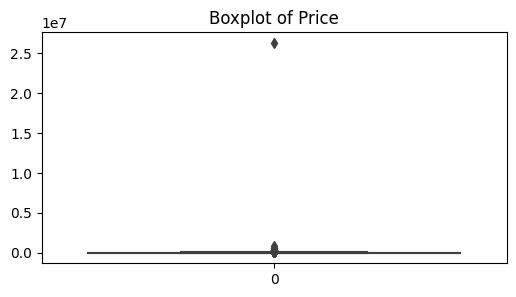

In [6]:
plt.figure(figsize=(6, 3))
# sns.boxplot(data=data, y="PRICE", color="coral")
sns.boxplot(data=data["PRICE"])
plt.title("Boxplot of Price")
plt.show()

In [15]:
# 0.5 X 10,000,000
data_remov_outlier = data.query("PRICE < 500000")
data_remov_outlier

,PRICE,LEVY,MANUFACTURER,MODEL,PROD_YEAR,CATEGORY,LEATHER_INTERIOR,FUEL_TYPE,ENGINE_VOLUME,MILEAGE_KM,CYLINDERS,GEAR_BOX_TYPE,DRIVE_WHEELS,DOORS,WHEEL,COLOR,AIRBAGS
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15720,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,4-5,Left wheel,Silver,12
15721,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2-4,Left wheel,Silver,5
15722,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8
15723,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4-5,Left wheel,Grey,4


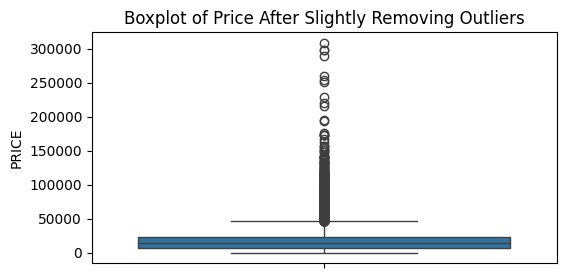

In [16]:
plt.figure(figsize=(6, 3))
# sns.boxplot(data=data, y="PRICE", color="coral")
sns.boxplot(data=data_remov_outlier["PRICE"])
plt.title("Boxplot of Price After Slightly Removing Outliers")
plt.show()

In [ ]:
#### We know that a non luxury used car price can not be above 300,000.

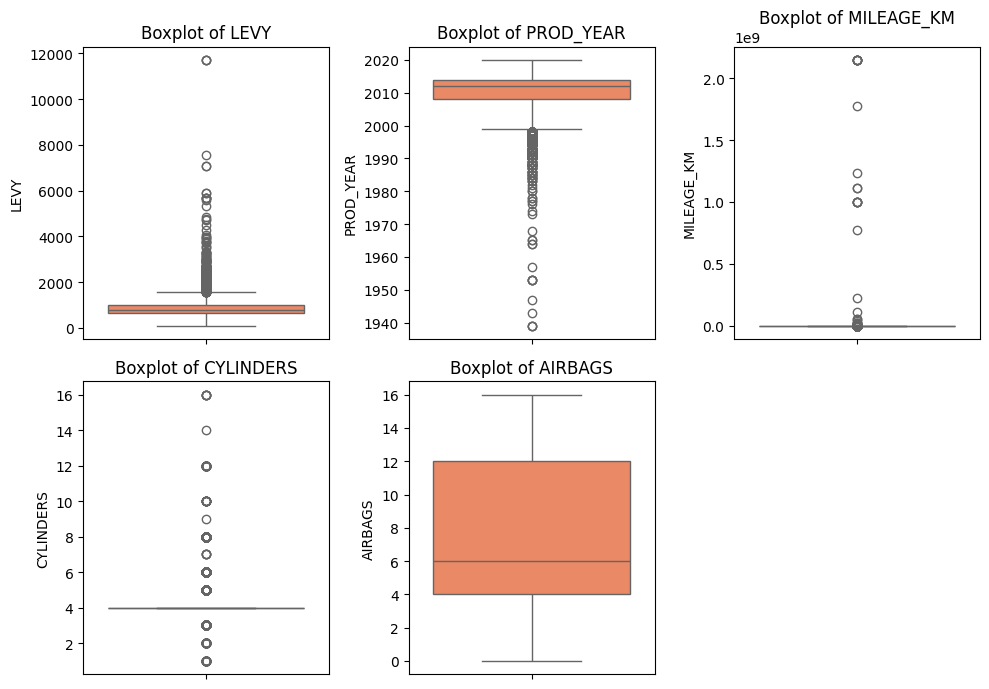

In [ ]:
# plotting a box plot for all numerical data columns


plt.figure(figsize=(10, 7))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data_remov_outlier[feature], color="coral")
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

##### 25. Histogram Plots

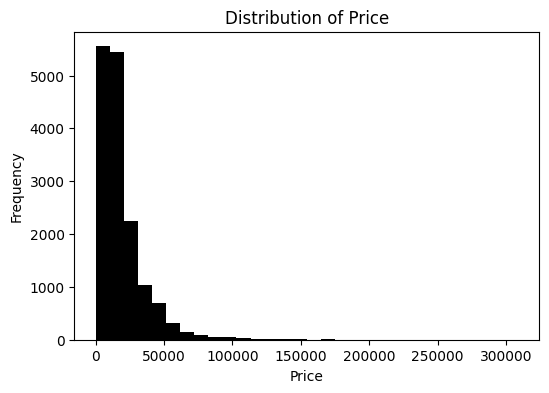

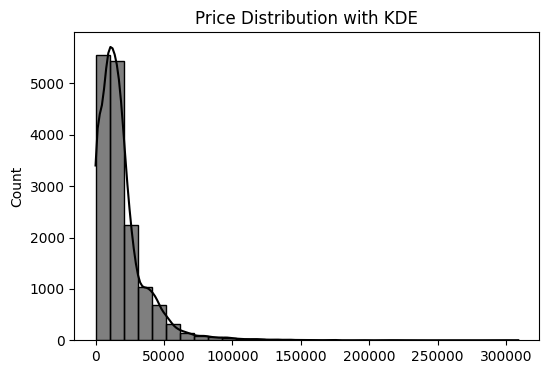

In [17]:
# target data(price) histogram plots
plt.figure(figsize=(6, 4))
plt.hist(data_remov_outlier["PRICE"], bins=30, color="black")
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(np.array(data_remov_outlier["PRICE"]), kde=True, color="black", bins=30)
plt.title("Price Distribution with KDE")
plt.show()

In [36]:
import plotly.express as px

# Plotly Histogram
fig = px.histogram(
    data_below400k, x="PRICE", nbins=30, title="Histogram of Price (Plotly)"
)
fig.show()

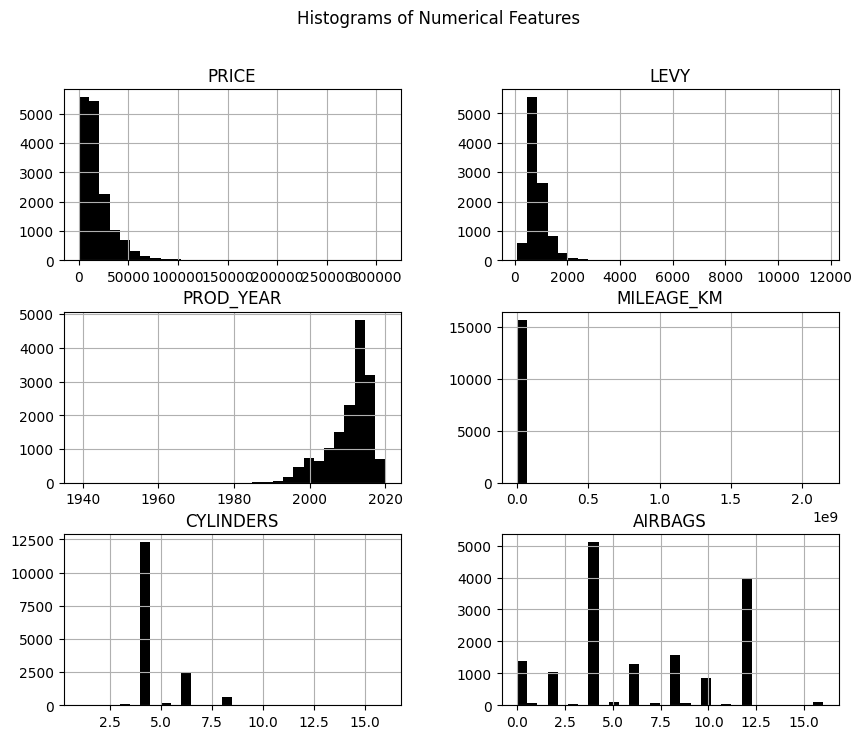

In [19]:
data_remov_outlier[numerical_cols].hist(bins=30, figsize=(10, 8), color="black")
plt.suptitle("Histograms of Numerical Features", fontsize=12)
plt.show()

##### 27. Missing Value Visualization
- Checking which feature has the missing value and couting the number of missing values

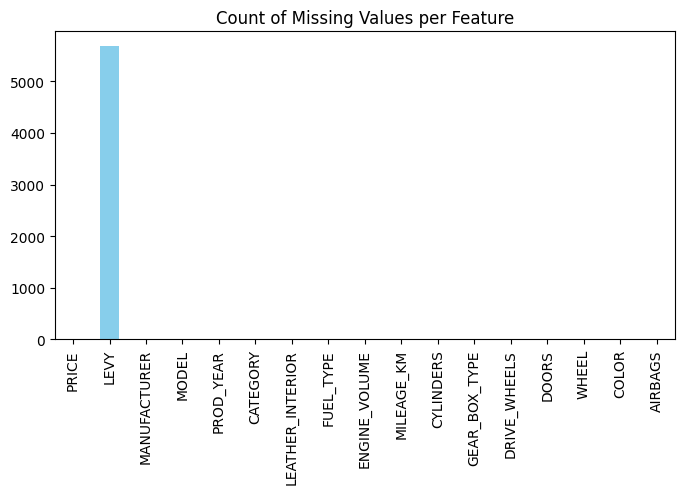

In [ ]:

# bar plot of missing value visualization
plt.figure(figsize=(8, 4))
data_remov_outlier.isnull().sum().plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values per Feature')
plt.show()

In [30]:
data_remov_outlier.dropna()

,PRICE,LEVY,MANUFACTURER,MODEL,PROD_YEAR,CATEGORY,LEATHER_INTERIOR,FUEL_TYPE,ENGINE_VOLUME,MILEAGE_KM,CYLINDERS,GEAR_BOX_TYPE,DRIVE_WHEELS,DOORS,WHEEL,COLOR,AIRBAGS
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4
5,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4.0,Automatic,Front,4-5,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15717,8781,1107.0,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7 Turbo,236000,4.0,Manual,Front,4-5,Left wheel,Beige,4
15720,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,4-5,Left wheel,Silver,12
15722,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4-5,Left wheel,Red,8
15723,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4-5,Left wheel,Grey,4


##### 28. Correlation Matrix 

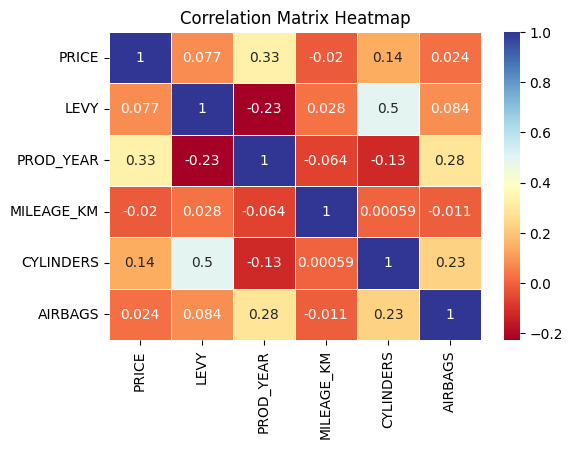

In [ ]:
# heatmap of correlation matrix

plt.figure(figsize=(6, 4))
correlation_matrix = data_remov_outlier[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

##### 29. Count Plots

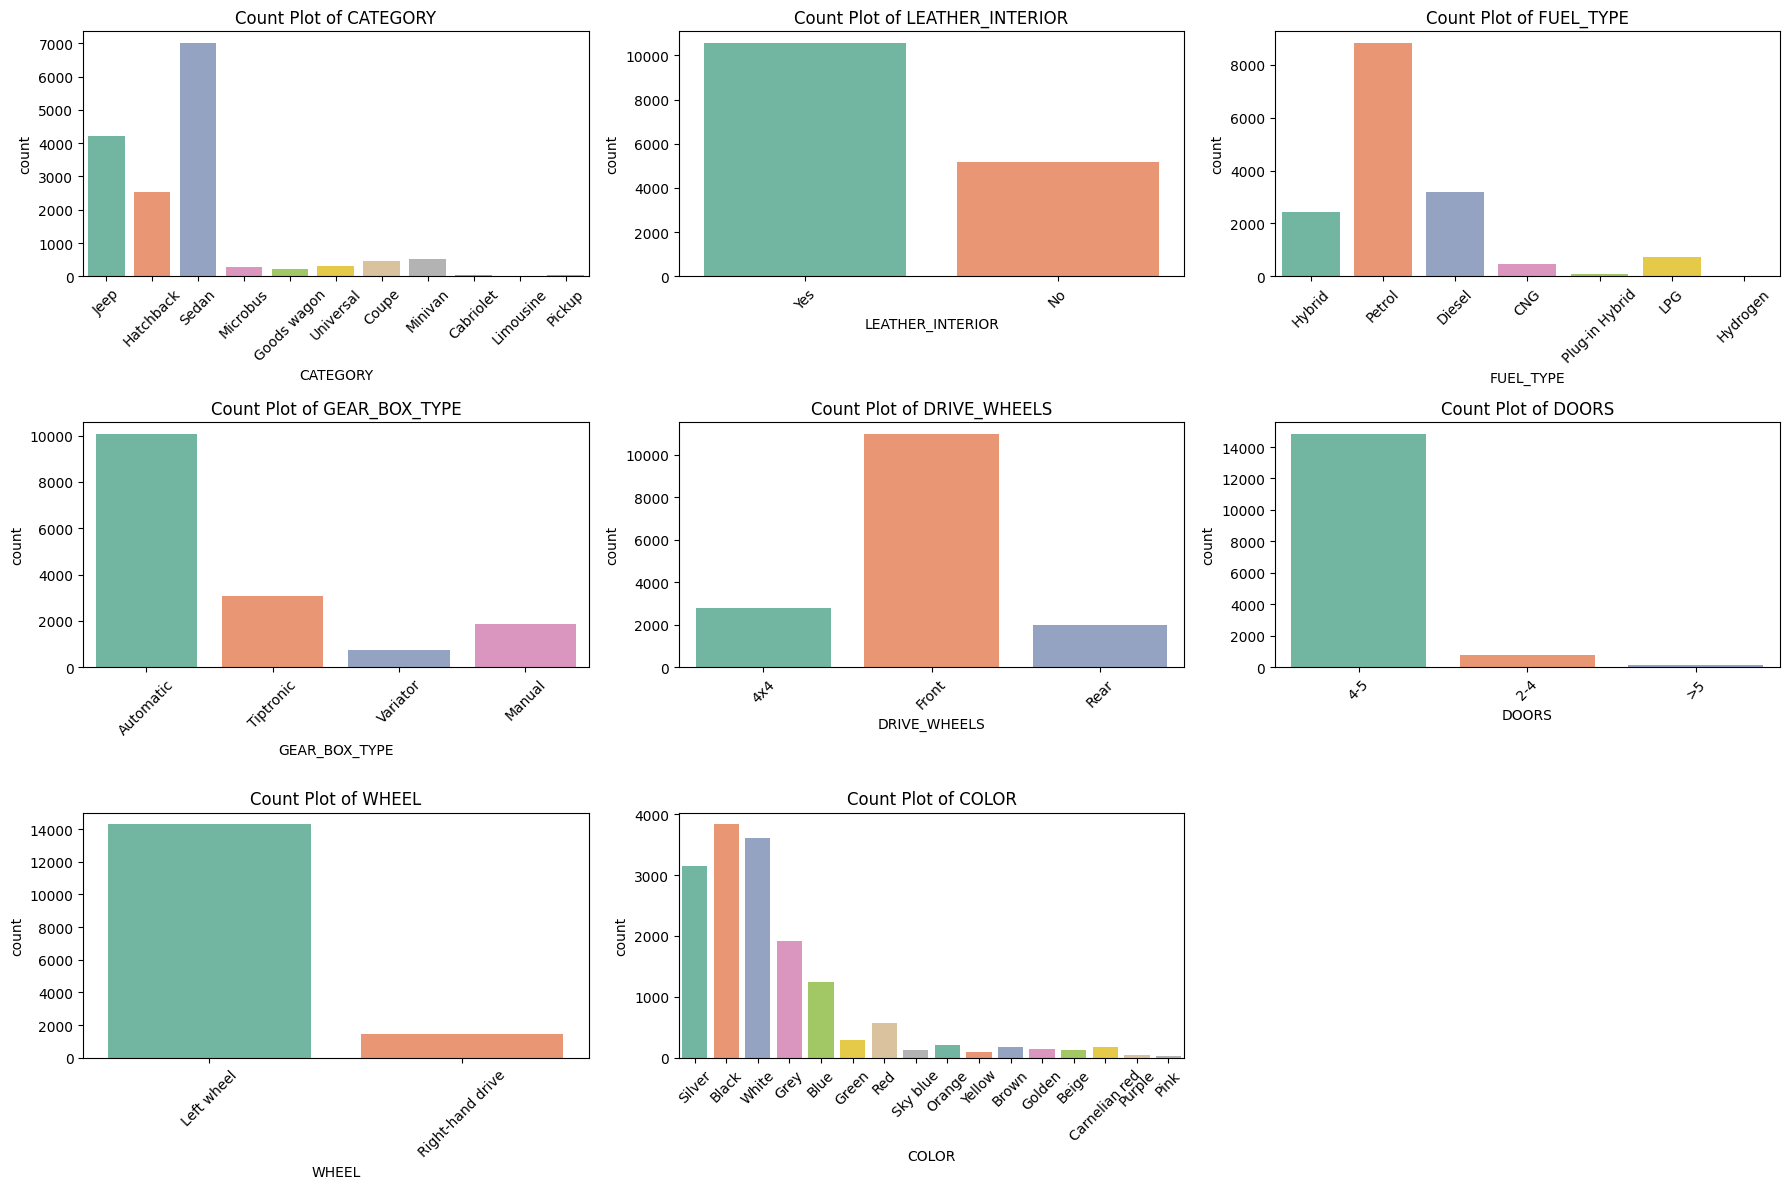

In [42]:
catego_cols = ['CATEGORY', 'LEATHER_INTERIOR', 'FUEL_TYPE',
       'GEAR_BOX_TYPE', 'DRIVE_WHEELS', 'DOORS', 'WHEEL',
       'COLOR']

# set up subplot grid: 3 plots per row
n_cols = 3
n_rows = (len(catego_cols) + n_cols - 1) // n_cols  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten() 
# plot each categorical feature
for i, col in enumerate(catego_cols):
    sns.countplot(data=data_remov_outlier, x=col, palette="Set2", ax=axes[i], hue=col)
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].tick_params(axis='x', rotation=45)
# turn off unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

#### 30. Numerical Feature Vs Targe Visualization

Discrete Variables Count: 2


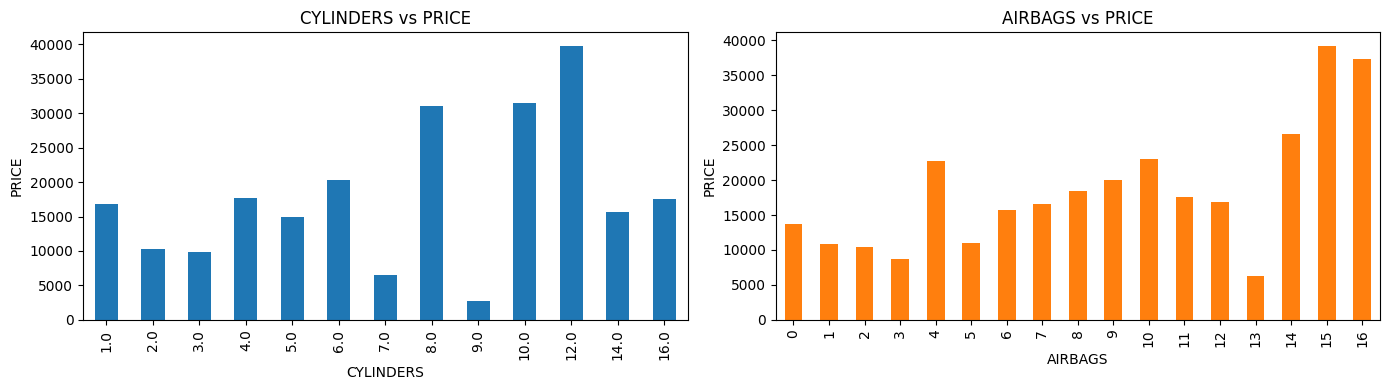

In [ ]:
discrete_feature = [
    feature
    for feature in numerical_cols
    if len(data_remov_outlier[feature].unique()) < 25
]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
# define a colormap (e.g., 'tab10', 'Set1', etc.)
colors = plt.get_cmap("tab10")
# get the number of discrete features
n_discrete_features = len(discrete_feature)
# set up the grid of subplots (2 columns, adjust rows dynamically)
n_cols = 2
n_rows = (n_discrete_features + 1) // n_cols  
# creating subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
for i, (ax, feature) in enumerate(zip(axes, discrete_feature)):
    # plot each feature in the subplot
    data_remov_outlier.groupby(feature)["PRICE"].mean().plot.bar(
        ax=ax, color=colors(i % 10)
    )
    # set labels and titles
    ax.set_xlabel(feature)
    ax.set_ylabel("PRICE")
    ax.set_title(f"{feature} vs PRICE")
# djust layout to avoid overlap
plt.tight_layout()
plt.show()

Continuous feature Count 3


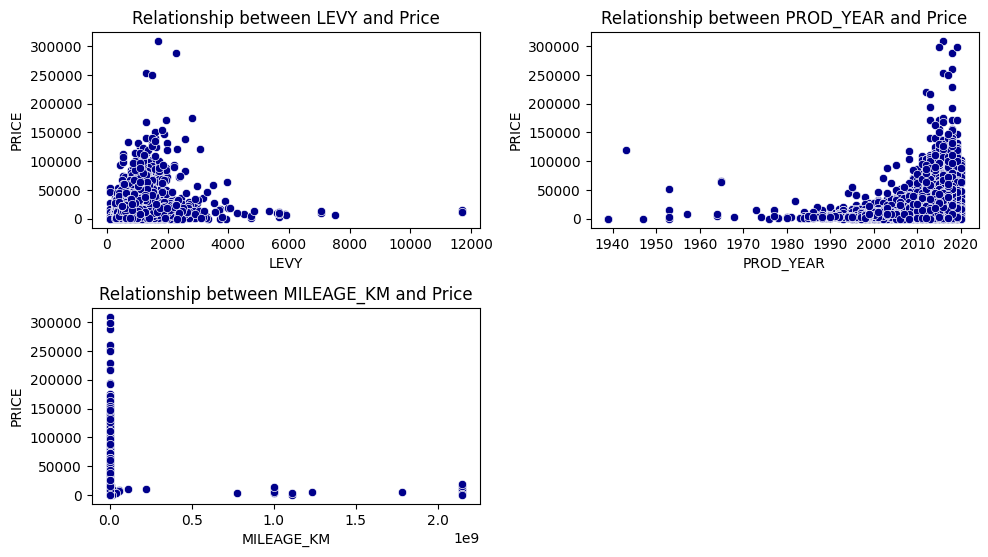

In [46]:
# getting the continous numeircal features
continuous_feature = [
    feature for feature in numerical_cols if feature not in discrete_feature
]
print("Continuous feature Count {}".format(len(continuous_feature)))
plt.figure(figsize=(10, 8))
for i, feature in enumerate(continuous_feature, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=data_remov_outlier, x=feature, y="PRICE", color="darkblue")
    plt.title(f"Relationship between {feature} and Price")
plt.tight_layout()
plt.show()

##### 31. Categorical Feature Vs Target Visualization

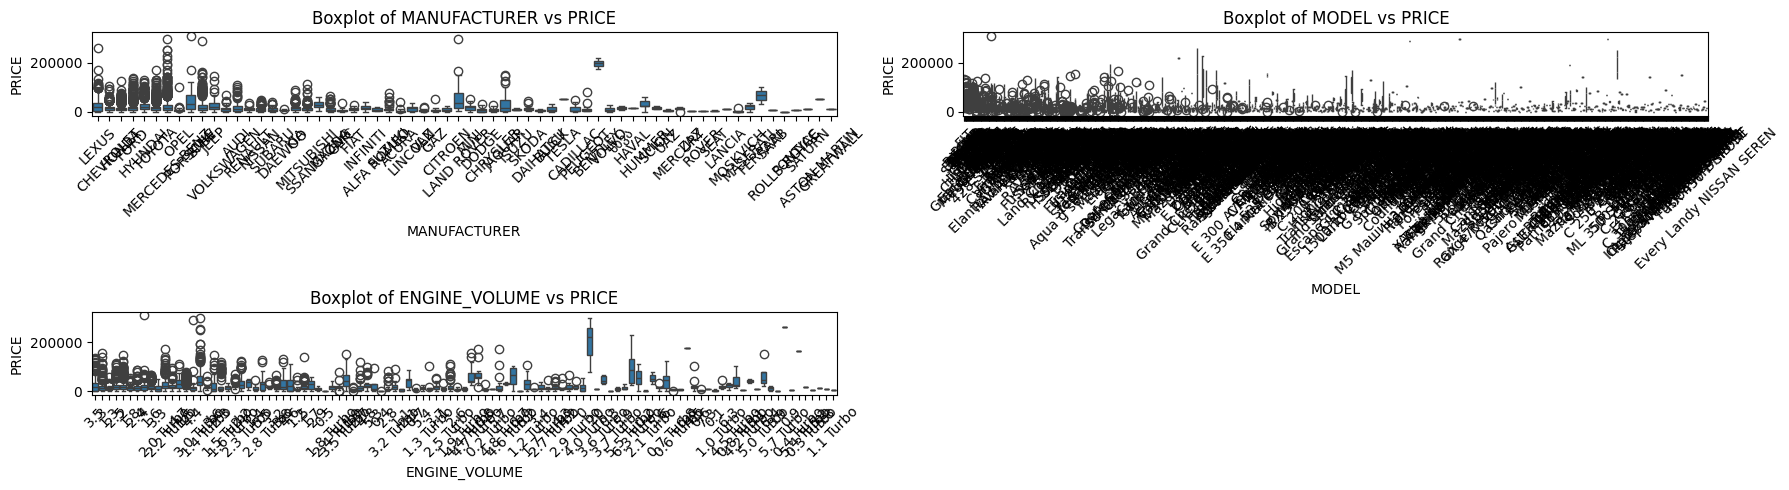

In [ ]:
# filtering catergorical feature that contains more than 20 unique variables
filtered_categorical_features = [
    feature for feature in categorical_cols if data_remov_outlier[feature].nunique() >= 20
]
target = "PRICE" 
n_features = len(filtered_categorical_features)
plots_per_row = 2
# Set up the figure size and subplots
fig, axes = plt.subplots(
    nrows=(n_features // plots_per_row) + 1,
    ncols=plots_per_row,
    figsize=(18, (n_features // plots_per_row) * 5),
)
# flatten axes for easy iteration
axes = axes.flatten()
# loop through categorical features and create box plots
for i, cat_feature in enumerate(filtered_categorical_features):
    sns.boxplot(x=cat_feature, y=target, data=data_remov_outlier, ax=axes[i])
    axes[i].set_title(f"Boxplot of {cat_feature} vs {target}")
    axes[i].tick_params(axis="x", rotation=45)
# remove empty subplots if any
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])
# adjust layout
plt.tight_layout()
plt.show()

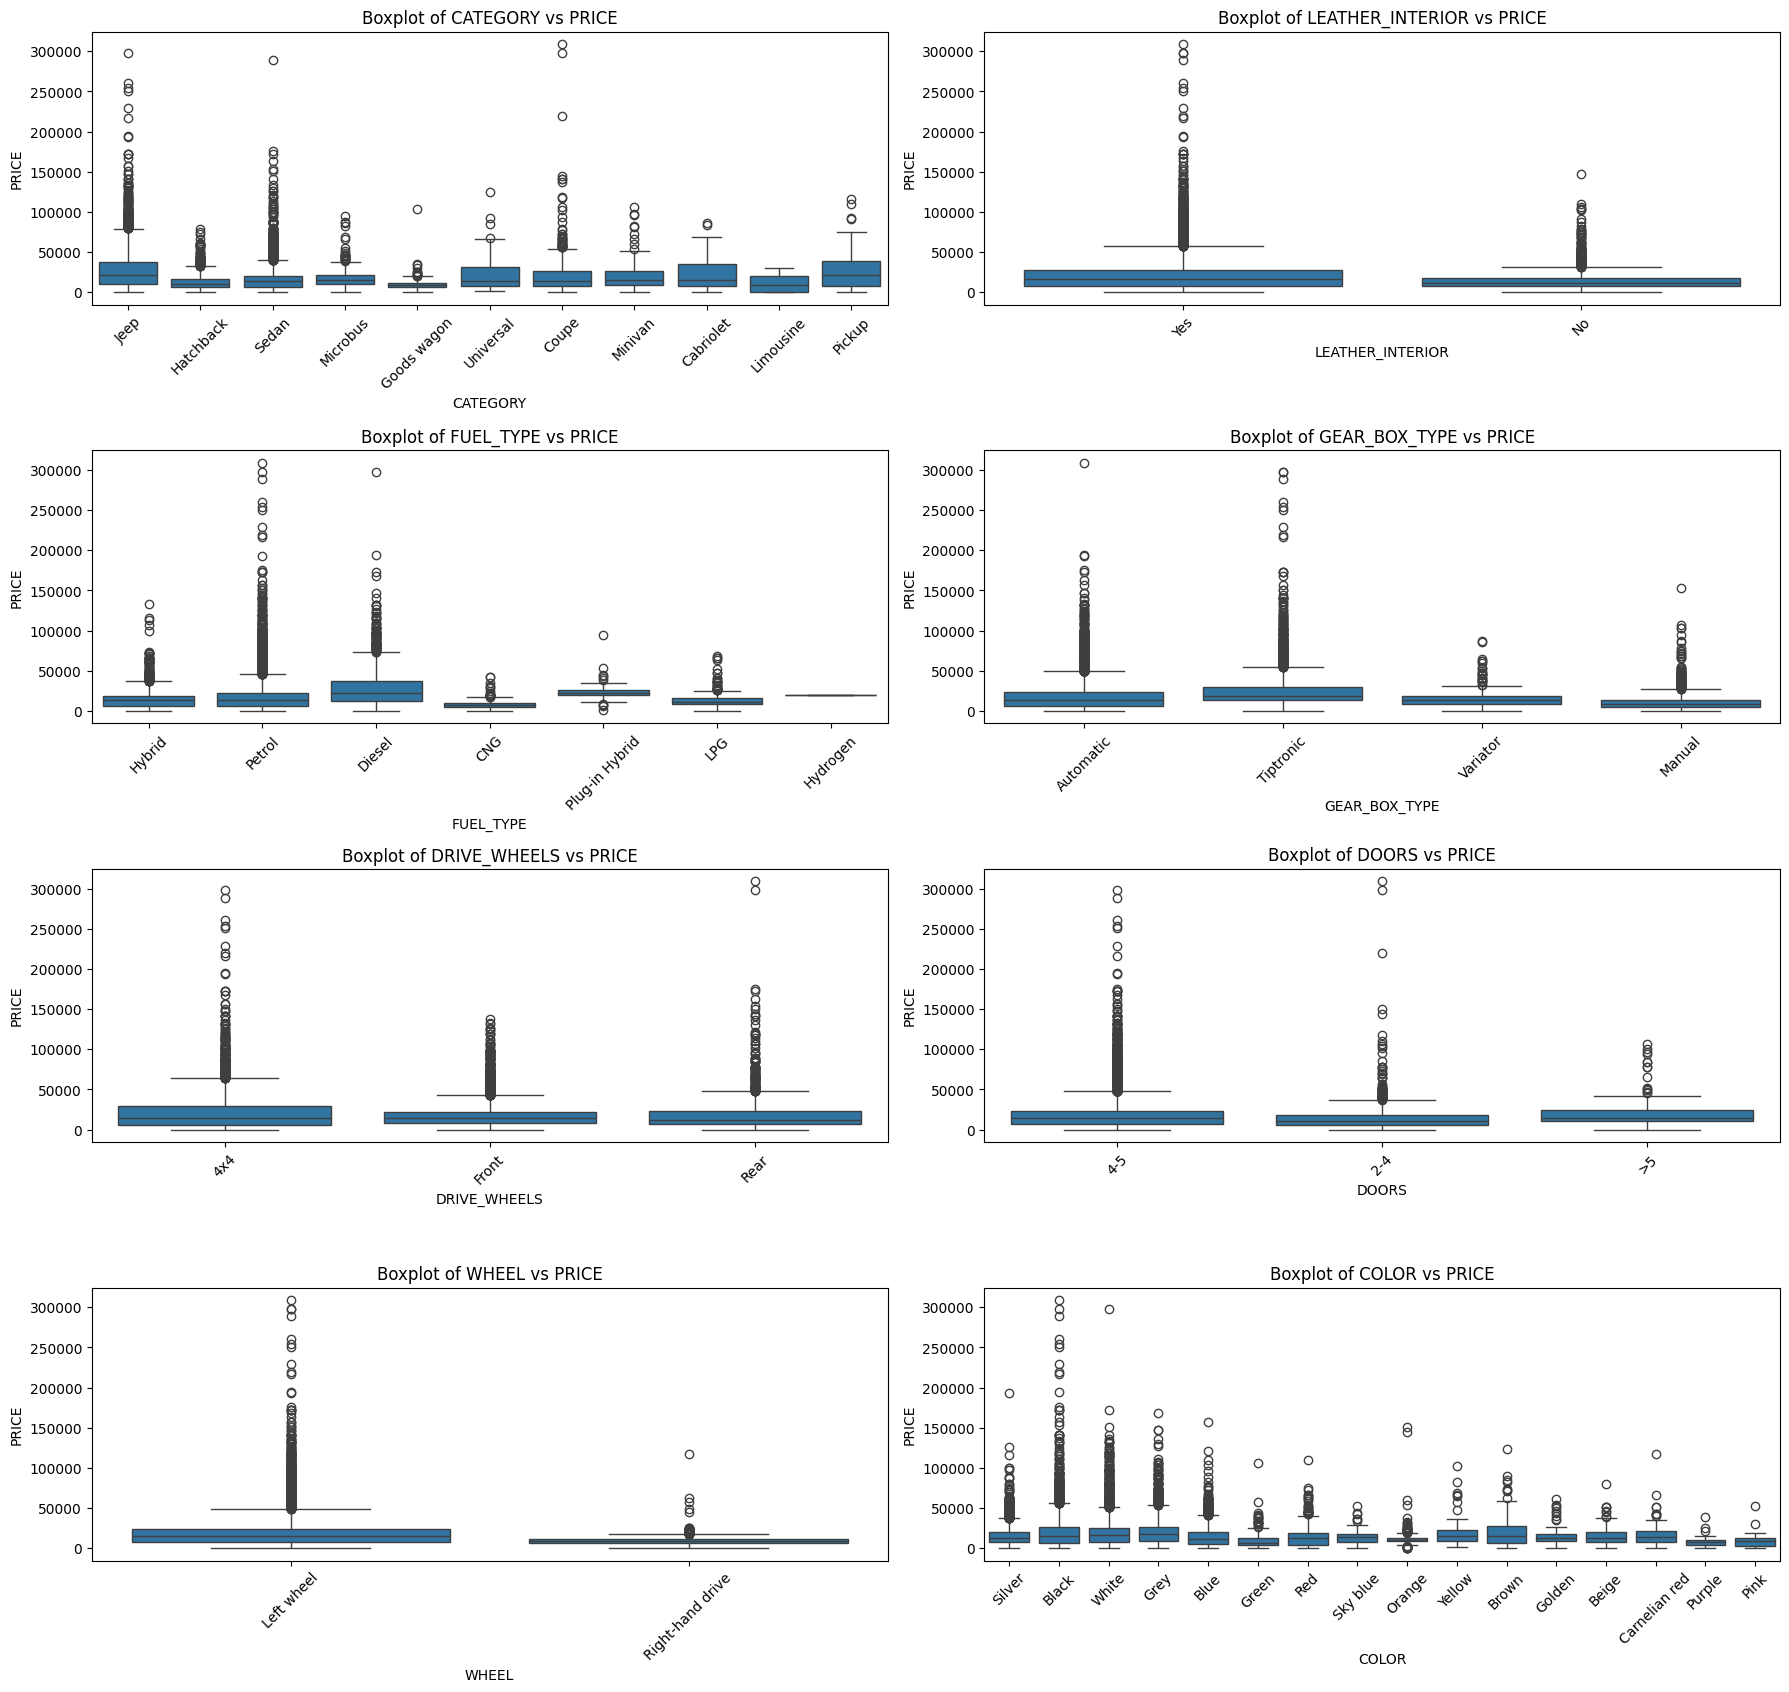

In [48]:
# filtering catergorical feature that contains more than 20 unique variables
filtered_categorical_features = [
    feature for feature in categorical_cols if data_remov_outlier[feature].nunique() < 20
]
target = "PRICE" 
n_features = len(filtered_categorical_features)
plots_per_row = 2
# Set up the figure size and subplots
fig, axes = plt.subplots(
    nrows=(n_features // plots_per_row) + 1,
    ncols=plots_per_row,
    figsize=(18, (n_features // plots_per_row) * 5),
)
# flatten axes for easy iteration
axes = axes.flatten()
# loop through categorical features and create box plots
for i, cat_feature in enumerate(filtered_categorical_features):
    sns.boxplot(x=cat_feature, y=target, data=data_remov_outlier, ax=axes[i])
    axes[i].set_title(f"Boxplot of {cat_feature} vs {target}")
    axes[i].tick_params(axis="x", rotation=45)
# remove empty subplots if any
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])
# adjust layout
plt.tight_layout()
plt.show()

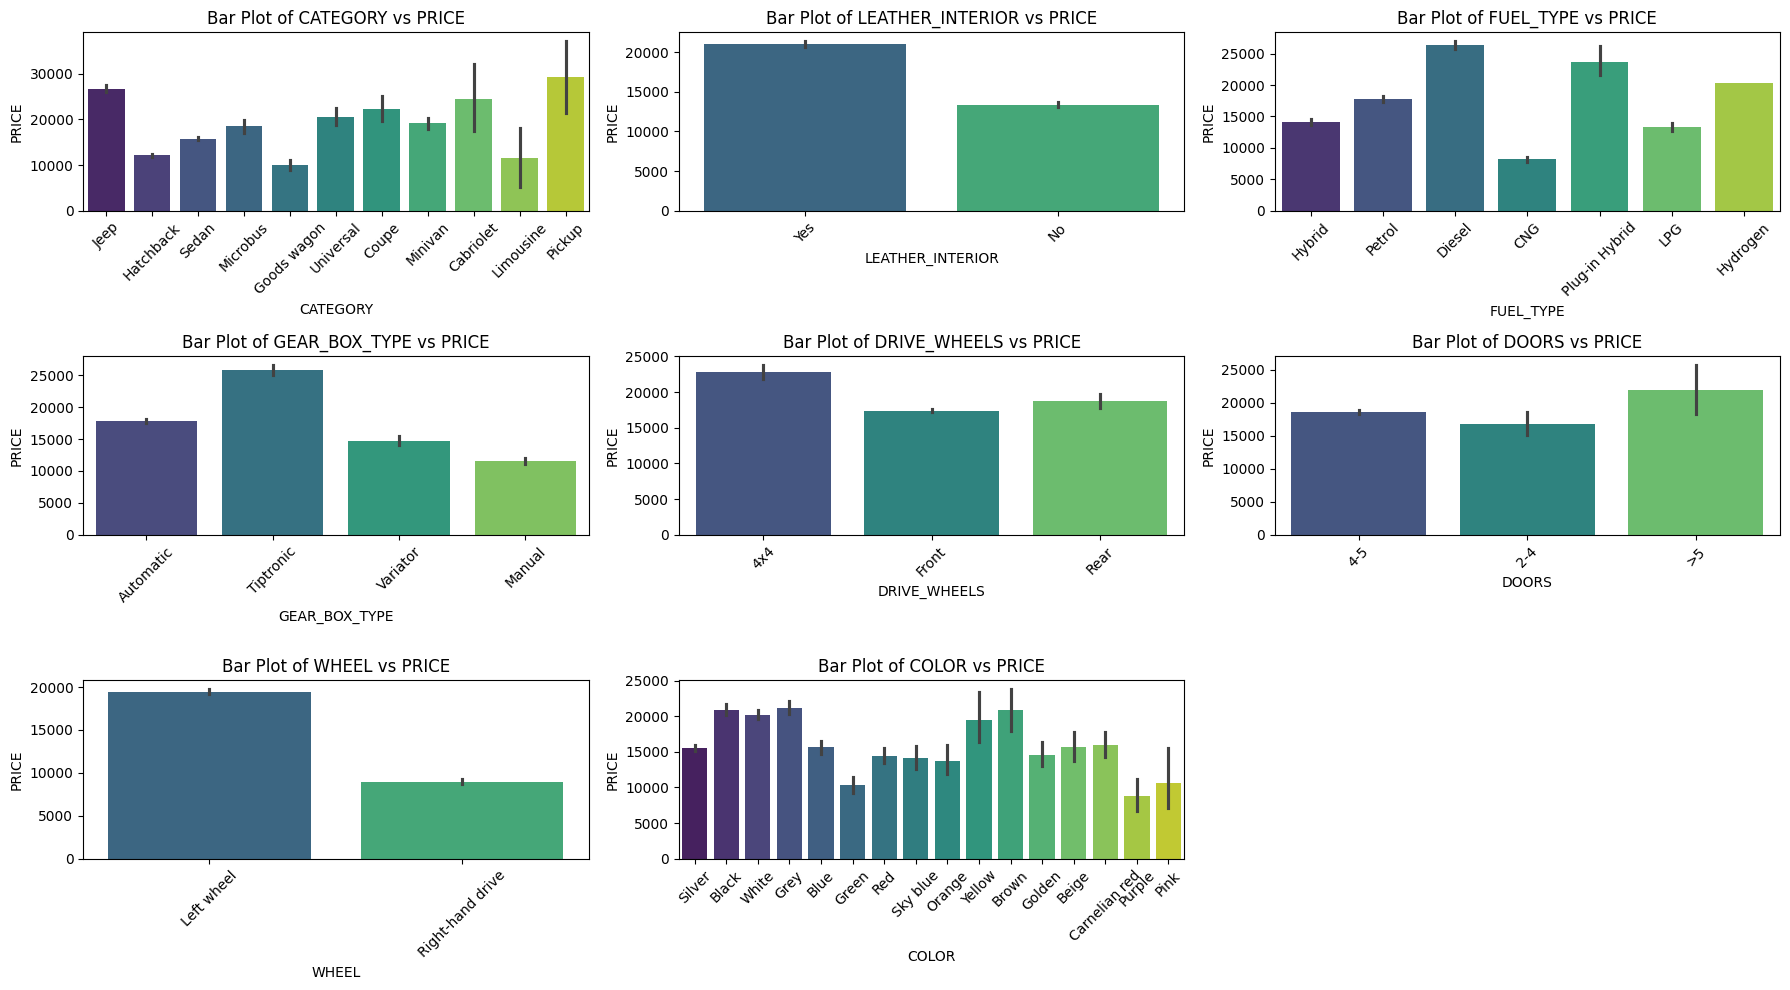

In [ ]:
# Alternative Bar plots

# no of filtered features
n_features = len(filtered_categorical_features)
plots_per_row = 3
# set up the figure size and subplots
fig, axes = plt.subplots(
    nrows=(n_features // plots_per_row) + 1,
    ncols=plots_per_row,
    figsize=(18, (n_features // plots_per_row) * 5),)
# flatten axes for easy iteration
axes = axes.flatten()
# loop through filtered categorical features and create bar plots
for i, cat_feature in enumerate(filtered_categorical_features):
    # create bar plot using the palette 'viridis'
    sns.barplot(
        x=cat_feature, y=target, data=data_remov_outlier, ax=axes[i], palette="viridis",hue=cat_feature
    )
    # set title and rotation for better readability
    axes[i].set_title(f"Bar Plot of {cat_feature} vs {target}")
    axes[i].tick_params(axis="x", rotation=45)
# remove empty subplots if any
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])
# adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##### 32 Creating Word Cloud

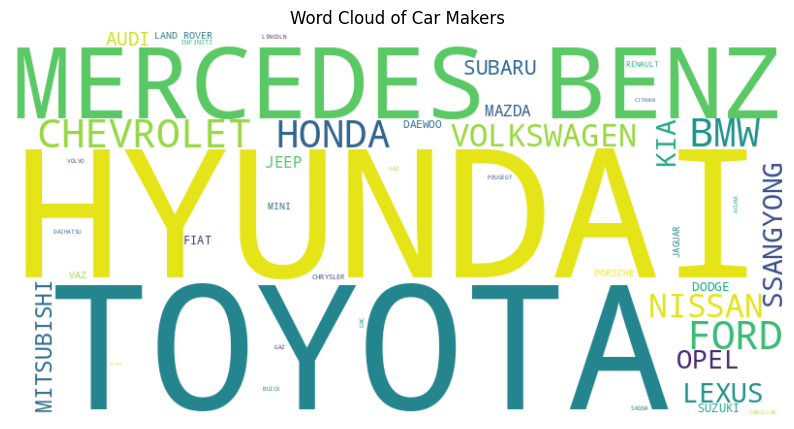

In [72]:
# Word cloud of car makes
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
    " ".join(data_remov_outlier["MANUFACTURER"])
)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud of Car Makers")
plt.axis("off")
plt.show()

#### 33. Plotting Table

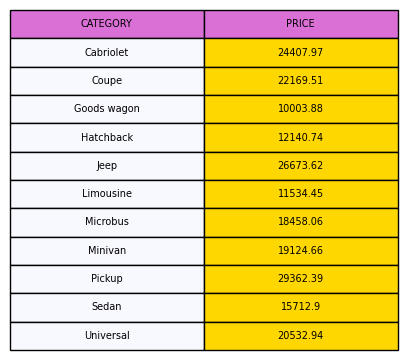

In [ ]:
# compute the mean of the "PRICE" for each category:
category_price_mean_df = data_remov_outlier.groupby("CATEGORY", as_index=False)["PRICE"].mean().round(2)
# set up the figure and axis
fig, ax1 = plt.subplots(1, 1, figsize=(5, 4))
fig.subplots_adjust(wspace=0.1)
# Create the table
table = ax1.table(
    cellText=category_price_mean_df.values,
    colLabels=category_price_mean_df.columns,
    loc="center",
    cellLoc="center",
    colColours=["orchid"] * category_price_mean_df.shape[1]  # column colors
)
table.scale(1, 1.7)       # adjust cell scaling
table.set_fontsize(7)     # set font size for readability
ax1.axis("off")           # turn off the axis for a clean table
# color specific cells for emphasis
for i in range(1, category_price_mean_df.shape[0] + 1):
    table[(i, 0)].set_facecolor("ghostwhite")  # first column cells
    table[(i, 1)].set_facecolor("gold")        # Second column cells
plt.show()